<a href="https://colab.research.google.com/github/jobutupak/Estatistica/blob/main/filmes_imdb_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math

# Ordenando os dados e encontrando valores iniciais

In [ ]:
base_filmes = pd.read_csv('/content/imdbdata.csv')

In [ ]:
base_filmes_ordenada = base_filmes.sort_values(['notas'], ascending=True)

In [ ]:
base_filmes_ordenada

,title,notas
0,The Room,3.6
1,Woodshock,4.2
2,A Glimpse Inside the Mind of Charles Swan III,4.6
3,Slice,4.6
4,False Positive,4.7
...,...,...
138,Everything Everywhere All at Once,8.0
139,Earth Mama,8.0
140,You Hurt My Feelings,8.0
141,Room,8.1


In [ ]:
at = base_filmes_ordenada['notas'].max() - base_filmes_ordenada['notas'].min()
at

4.6

In [ ]:
k = math.sqrt(len(base_filmes_ordenada['notas']))
k = math.ceil(k)
k
k = 10

In [ ]:
h = at / k
h = round(h, 2)
h

0.46

# Criando a tabela de frequências


Determinando as classes e seus intervalos.

In [ ]:
classes = []
lim_min = base_filmes_ordenada['notas'].min()
lim_max = base_filmes_ordenada['notas'].max()
lim_inferior = lim_min

while True:
  if round(lim_inferior + h, 1) == lim_max:
    classes.append([round(lim_inferior, 2), round(lim_inferior + h, 1)])
    break
  else:
    classes.append([round(lim_inferior, 2), round(lim_inferior + h, 2)])
    lim_inferior = lim_inferior + h

classes

[[3.6, 4.06],
 [4.06, 4.52],
 [4.52, 4.98],
 [4.98, 5.44],
 [5.44, 5.9],
 [5.9, 6.36],
 [6.36, 6.82],
 [6.82, 7.28],
 [7.28, 7.74],
 [7.74, 8.2]]

Atribuindo os valores da base de dados às suas determinadas classes.

In [ ]:
valores_classes = []
for classe in classes:
  valores = base_filmes_ordenada[(classe[0] <= base_filmes_ordenada['notas']) & (classe[1] > base_filmes_ordenada['notas'])]['notas']

  if classes.index(classe) == len(classes) - 1:
    valores = base_filmes_ordenada[(classe[0] <= base_filmes_ordenada['notas']) & (classe[1] >= base_filmes_ordenada['notas'])]['notas']

  else:
    pass
  valores_classes.append(list(valores))

valores_classes

Determinando as frequências absolutas de cada classe.

In [ ]:
frequencias = []
for lista in valores_classes:
  frequencias.append(len(lista))

frequencias

Determinando as frequências acumuladas.

In [ ]:
freq_acm = []
acumulada = 0
for ind in range(0, len(frequencias)):
  acumulada += frequencias[ind]
  freq_acm.append(acumulada)

freq_acm

[1, 2, 5, 13, 27, 57, 84, 109, 133, 143]

Determinando o ponto médio de cada classe.

In [ ]:
ponto_medio = []
for classe in classes:
  pt = round(((classe[1] + classe[0]) / 2), 3)
  ponto_medio.append(pt)

ponto_medio

[3.83, 4.29, 4.75, 5.21, 5.67, 6.13, 6.59, 7.05, 7.51, 7.97]

Criando e exibundo a tabela de distribuição de frequências em intervalos.

In [ ]:
tabela_de_frequencias = pd.DataFrame({
    'Classes': classes,
    'Frequência': frequencias,
    'Freq. Acumulada': freq_acm,
})

tabela_de_frequencias['Freq. Relativa'] = round((tabela_de_frequencias['Frequência'] / sum(tabela_de_frequencias['Frequência'])), 3)
tabela_de_frequencias['Freq. Relativa %'] = round((tabela_de_frequencias['Freq. Relativa'] * 100), 3)
tabela_de_frequencias['Xm'] = ponto_medio
tabela_de_frequencias['Xm * f'] = round(tabela_de_frequencias['Xm'] * tabela_de_frequencias['Frequência'], 3)

xm_media = tabela_de_frequencias['Xm'] - base_filmes_ordenada['notas'].mean()
f_xm_media_2 = round(tabela_de_frequencias['Frequência'] * (xm_media * xm_media), 3)


tabela_de_frequencias2 = tabela_de_frequencias.append({
    'Classes' : 'Total', 
    'Frequência' : sum(tabela_de_frequencias['Frequência']), 
    'Freq. Acumulada' : '-', 
    'Freq. Relativa': sum(tabela_de_frequencias['Freq. Relativa']),
    'Freq. Relativa %': sum(tabela_de_frequencias['Freq. Relativa %']),
    'Xm': '-',
    'Xm * f' : sum(tabela_de_frequencias['Xm * f'])
}, ignore_index=True)

tabela_de_frequencias2.style.set_table_attributes("style='display:inline'").set_caption('Distribuição de frequências em intervalos das notas dos filmes lançados até março de 2023, segundo o IMDB, do estúdio de filmes A24')


<ipython-input-38-e616e90676a5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabela_de_frequencias2 = tabela_de_frequencias.append({'Classes' : 'Total',
<ipython-input-38-e616e90676a5>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabela_de_frequencias2 = tabela_de_frequencias.append({


,Classes,Frequência,Freq. Acumulada,Freq. Relativa,Freq. Relativa %,Xm,Xm * f
0,"[3.6, 4.06]",1,1,0.007000,0.700000,3.830000,3.830000
1,"[4.06, 4.52]",1,2,0.007000,0.700000,4.290000,4.290000
2,"[4.52, 4.98]",3,5,0.021000,2.100000,4.750000,14.250000
3,"[4.98, 5.44]",8,13,0.056000,5.600000,5.210000,41.680000
4,"[5.44, 5.9]",14,27,0.098000,9.800000,5.670000,79.380000
5,"[5.9, 6.36]",30,57,0.210000,21.000000,6.130000,183.900000
6,"[6.36, 6.82]",27,84,0.189000,18.900000,6.590000,177.930000
7,"[6.82, 7.28]",25,109,0.175000,17.500000,7.050000,176.250000
8,"[7.28, 7.74]",24,133,0.168000,16.800000,7.510000,180.240000
9,"[7.74, 8.2]",10,143,0.070000,7.000000,7.970000,79.700000


# Criando as funções

In [ ]:
def calc_media(nome_data_frame, col_dados):
  base_dados = pd.read_csv(nome_data_frame)
  tam = len(base_dados[col_dados])
  media = sum(base_dados[col_dados]) / tam
  return round(media, 3)

media = calc_media('/content/imdbdata.csv', 'notas')
media

6.581

In [ ]:
def calc_quartil(nome_data_frame, col_dados, n_quartil):
  base_dados = pd.read_csv(nome_data_frame)
  base_dados = base_dados.sort_values([col_dados], ascending=True)
  tam_base = len(base_dados[col_dados])
  tam_f = tam_base * n_quartil


  if tam_base % 2 != 0:
    ind_quartilx = int((tam_f + 1) / 4) - 1
    quartilx = list(base_dados[col_dados])[ind_quartilx]

  else:
    ind_quatilx = [int((tam_f) / 4), int((tam_f) / 2) + 1]
    quartilx = (list(base_dados[col_dados])[ind_quartilx[0]] + list(base_dados[col_dados])[ind_quartilx[1]]) / 2
    quartil -= 1

  return quartilx


quartil1 = calc_quartil('/content/imdbdata.csv', 'notas', 1)
mediana = calc_quartil('/content/imdbdata.csv', 'notas', 2)
quartil3 = calc_quartil('/content/imdbdata.csv', 'notas', 3)

print(quartil1)
print(mediana)
print(quartil3)

6.1
6.6
7.2


In [ ]:
def calc_moda(nome_data_frame, col_dados):
  base_dados = pd.read_csv(nome_data_frame)
  moda = (base_dados[col_dados].value_counts().keys())[0]

  return moda

moda = calc_moda('/content/imdbdata.csv', 'notas')
moda

6.3

In [ ]:
def calc_variancia(tab_freq, col_freq, col_xm_med):
  somatorio = sum(col_xm_med)
  tam = sum(tab_freq[col_freq])
  variancia = round(somatorio / tam, 3)
  
  return variancia

variancia = calc_variancia(tabela_de_frequencias, 'Frequência', f_xm_media_2)
variancia

0.707

In [ ]:
def calc_desvio_padrao(variancia):
  dp = math.sqrt(variancia)
  return round(dp, 3)

desvio_padrao = calc_desvio_padrao(variancia)
desvio_padrao

0.841

In [ ]:
def coeficiente_variacao(desvio_padrao, media):
  cv = round((desvio_padrao / media) * 100, 3)
  return cv

coeficiente_variacao_n = coeficiente_variacao(desvio_padrao, media)
coeficiente_variacao_n

12.779

# Gráficos

Text(0.5, 1.0, 'Diagrama de caixa das notas dos filmes lançados até março de 2023,\n segundo o IMDB, do estúdio de filmes A24\n')

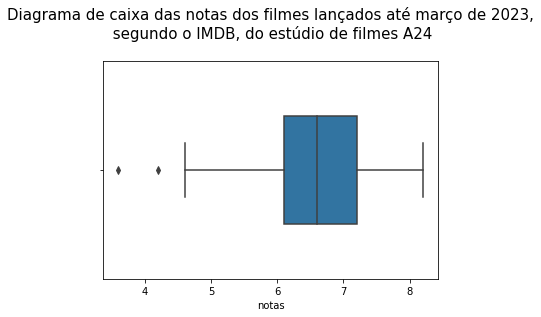

In [ ]:
sns.boxplot(data = base_filmes_ordenada, x="notas", width=0.5).set_title('Diagrama de caixa das notas dos filmes lançados até março de 2023,\n segundo o IMDB, do estúdio de filmes A24\n', fontdict={'fontsize': 15})

[Text(0.5, 1.0, 'Histograma das notas dos filmes lançados até março de 2023,\n segundo o IMDB, do estúdio de filmes A24\n')]

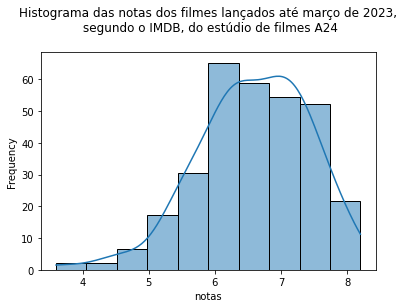

In [ ]:
sns.histplot(base_filmes_ordenada['notas'], bins = 10, kde=True, stat='frequency').set(title='Histograma das notas dos filmes lançados até março de 2023,\n segundo o IMDB, do estúdio de filmes A24\n')